In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
mag7 = ['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']
top15_sp500 = mag7 + ['GOOG', 'BRK-B', 'UNH', 'XOM', 'LLY', 'JPM', 'JNJ', 'V']
sp500 = 'SPY'
start_date = '2000-01-01'

In [4]:
df = yf.download([sp500] + top15_sp500, start=start_date)
df = df['Adj Close']
df

[*********************100%%**********************]  16 of 16 completed


Ticker,AAPL,AMZN,BRK-B,GOOG,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,SPY,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,
2000-01-03,0.844004,4.468750,35.299999,NaN,NaN,24.500565,23.645031,32.907978,NaN,35.935863,0.089453,93.290146,NaN,5.377778,NaN,18.035812
2000-01-04,0.772846,4.096875,34.080002,NaN,NaN,23.603605,23.126219,31.872738,NaN,34.721939,0.087065,89.641922,NaN,5.308995,NaN,17.690363
2000-01-05,0.784155,3.487500,34.639999,NaN,NaN,23.852755,22.983467,32.280560,NaN,35.088043,0.084199,89.802284,NaN,5.296488,NaN,18.654757
2000-01-06,0.716296,3.278125,36.080002,NaN,NaN,24.600235,23.309772,33.221676,NaN,33.912682,0.078704,88.359108,NaN,5.490336,NaN,19.619169
2000-01-07,0.750226,3.478125,36.400002,NaN,NaN,25.646713,23.738037,35.668610,NaN,34.355843,0.080019,93.490654,NaN,6.134421,NaN,19.561586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,215.990005,166.940002,431.670013,165.389999,163.669998,160.619995,205.800003,890.435791,517.770020,405.289490,104.750000,532.989990,200.000000,558.760010,259.760010,117.900795
2024-08-12,217.529999,166.800003,430.390015,163.949997,162.289993,159.880005,206.190002,883.145996,515.950012,406.078064,109.019997,533.270020,197.490005,565.289978,259.890015,118.049599
2024-08-13,221.270004,170.229996,432.410004,165.929993,164.160004,158.389999,207.940002,906.782959,528.539978,413.265137,116.139999,542.039978,207.830002,574.239990,260.130005,116.918709


In [5]:
mag7_df = df[mag7]
spy_df = df['SPY'].copy()
mag7_df

Ticker,GOOGL,AMZN,AAPL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2000-01-03,NaN,4.468750,0.844004,NaN,35.935863,0.089453,NaN
2000-01-04,NaN,4.096875,0.772846,NaN,34.721939,0.087065,NaN
2000-01-05,NaN,3.487500,0.784155,NaN,35.088043,0.084199,NaN
2000-01-06,NaN,3.278125,0.716296,NaN,33.912682,0.078704,NaN
2000-01-07,NaN,3.478125,0.750226,NaN,34.355843,0.080019,NaN
...,...,...,...,...,...,...,...
2024-08-09,163.669998,166.940002,215.990005,517.770020,405.289490,104.750000,200.000000
2024-08-12,162.289993,166.800003,217.529999,515.950012,406.078064,109.019997,197.490005
2024-08-13,164.160004,170.229996,221.270004,528.539978,413.265137,116.139999,207.830002


In [6]:
spy_df

Date
2000-01-03     93.290146
2000-01-04     89.641922
2000-01-05     89.802284
2000-01-06     88.359108
2000-01-07     93.490654
                 ...    
2024-08-09    532.989990
2024-08-12    533.270020
2024-08-13    542.039978
2024-08-14    543.750000
2024-08-15    553.070007
Name: SPY, Length: 6194, dtype: float64

In [22]:
def rolling_alphas_betas(df_input, tickers, days = 125):
    betass = dict()
    alphass = dict()
    datess = dict()
    rss = dict()
    
    for t in tickers:
        betas = []
        alphas = []
        rs = []
        dates = []
        for _df in df_input.rolling(days):
            returns = _df[t].pct_change().dropna()
            if returns.shape[0] != days - 1:
                continue
                
            b_returns = _df['SPY'].pct_change()
            b_returns = b_returns[b_returns.index >= returns.index[0]]
            beta, alpha, r, _, _ = stats.linregress(b_returns, returns)
            betas.append(beta)
            alphas.append(alpha)
            rs.append(r)
            dates.append(_df.index[-1])
        
        betass[t] = betas
        alphass[t] = alphas
        datess[t] = dates
        rss[t] = rs
        
    return alphass, betass, datess, rss

In [23]:
tickers = top15_sp500
days = 120
alphass, betass, datess, rss = rolling_alphas_betas(df, tickers, days=days)

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_20413/410862727.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = _df[t].pct_change().dropna()


In [24]:
dates_indexes = max([len(d) for d in datess.values()])

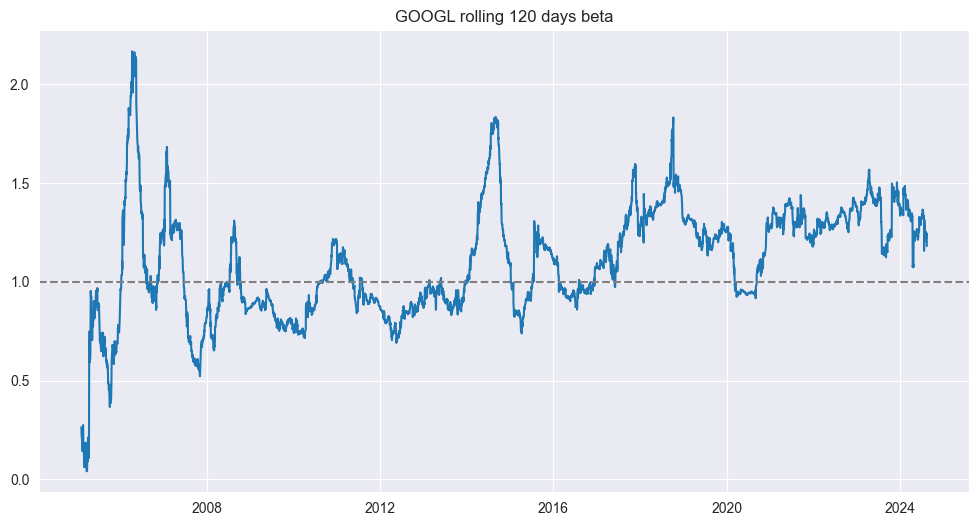

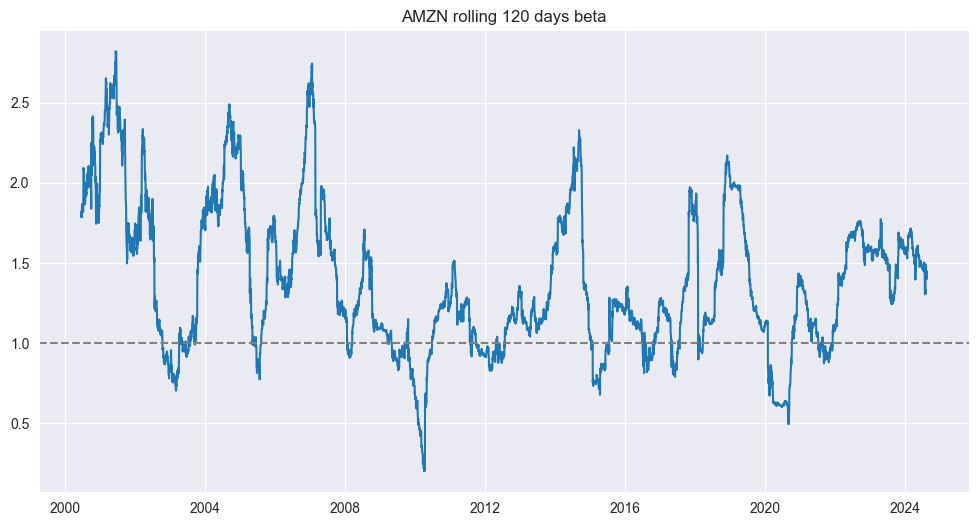

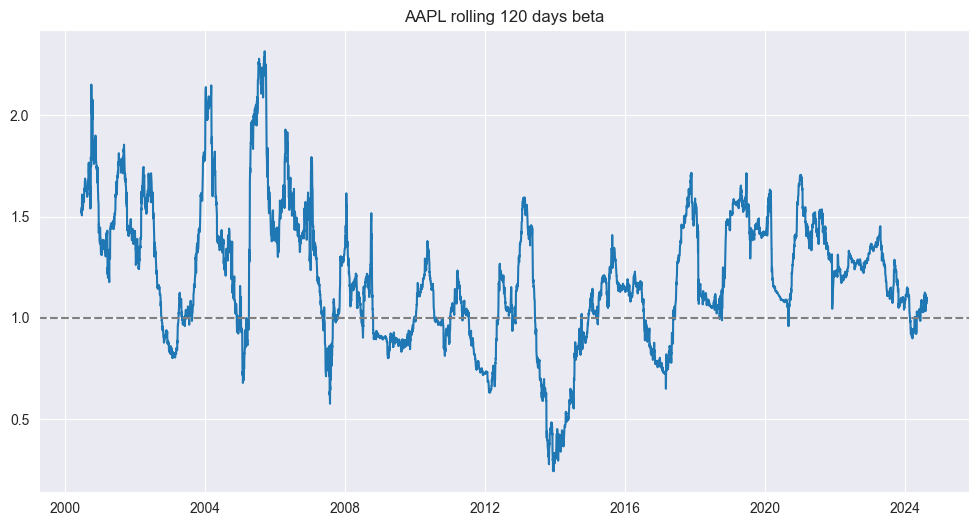

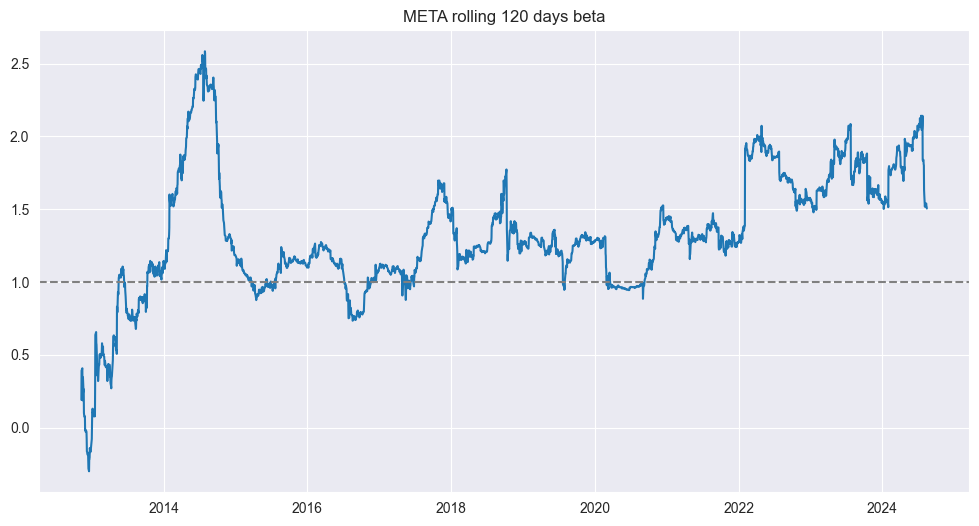

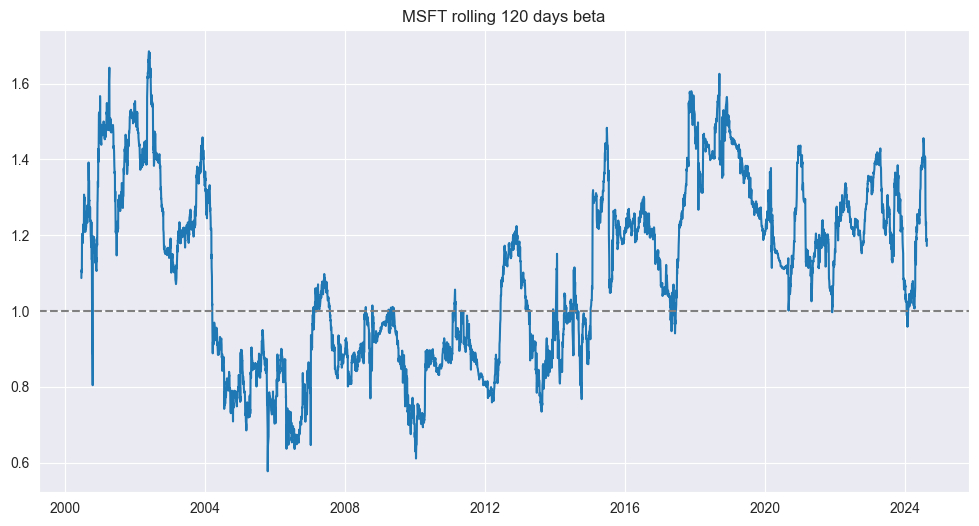

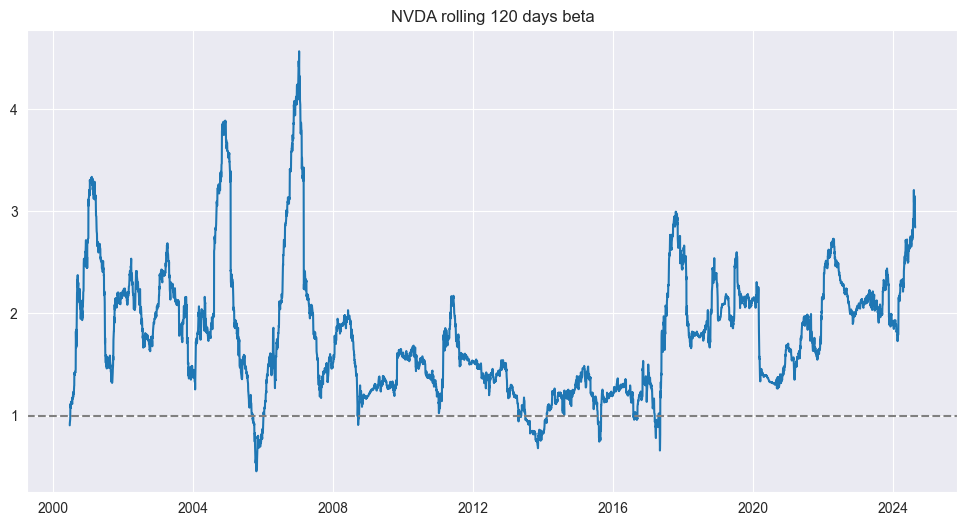

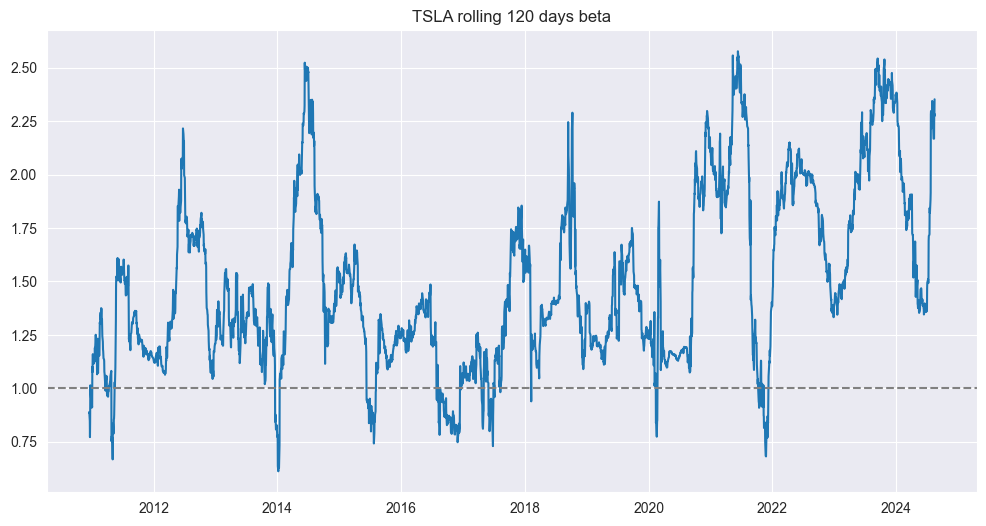

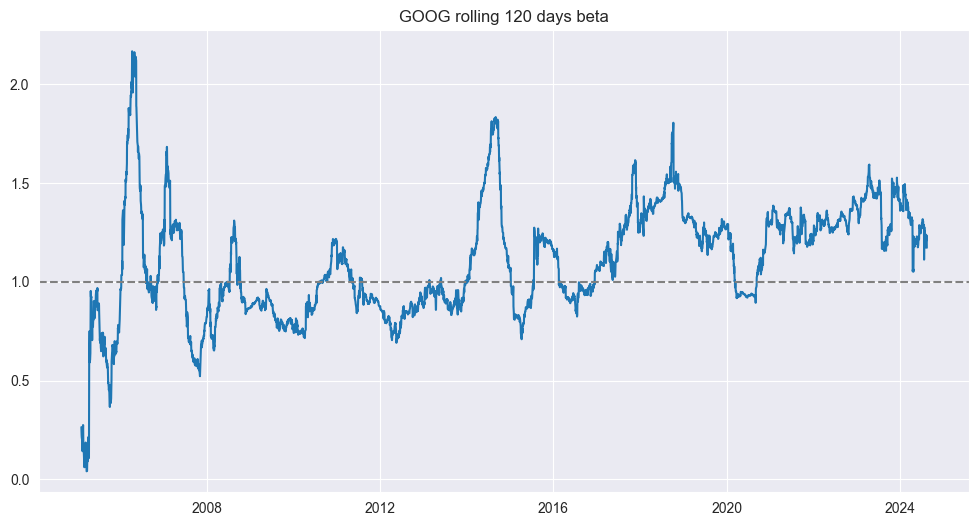

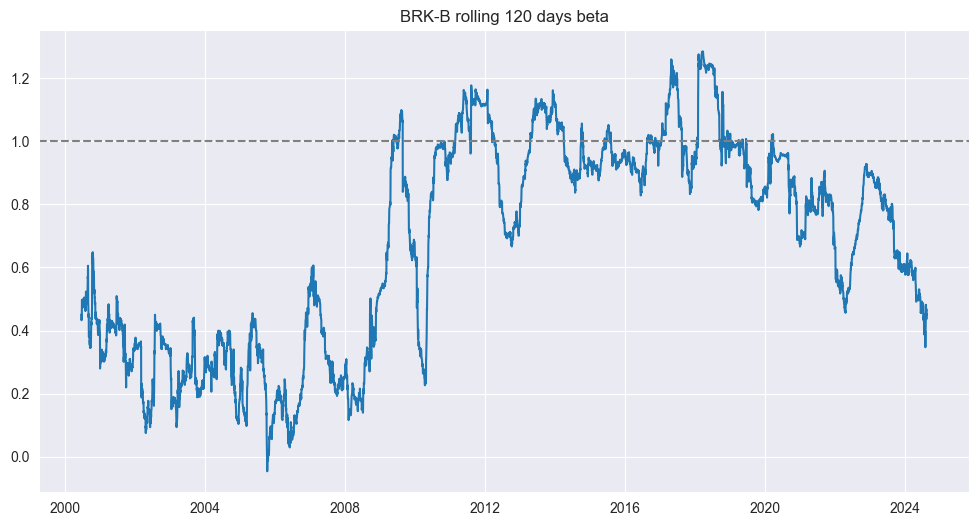

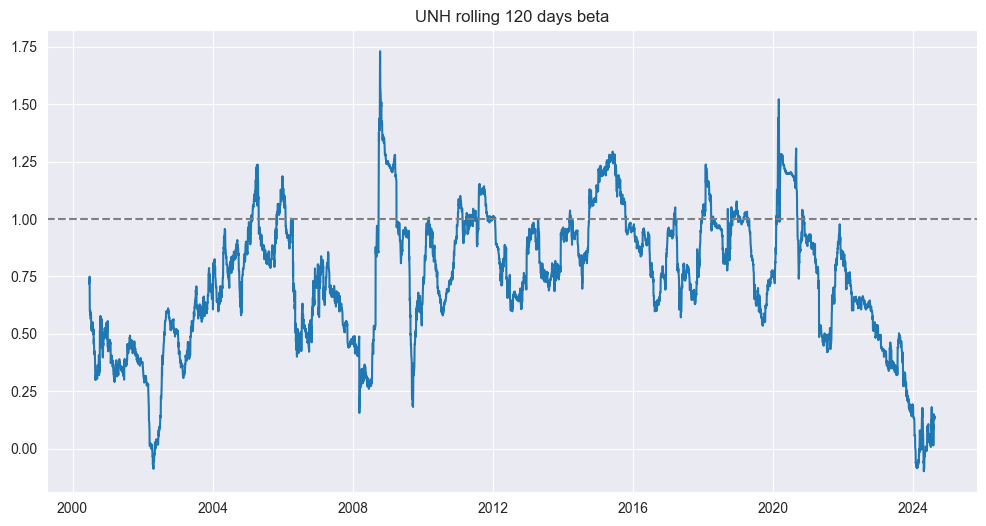

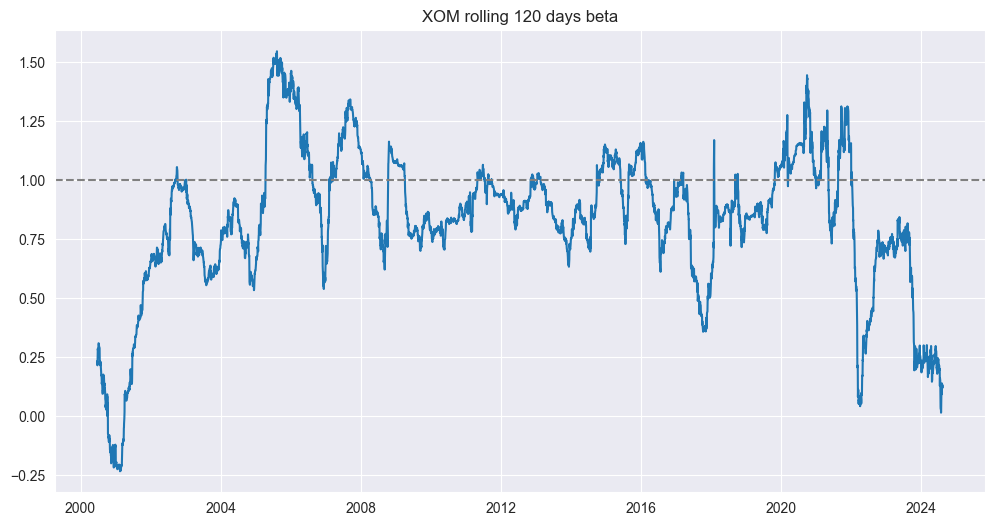

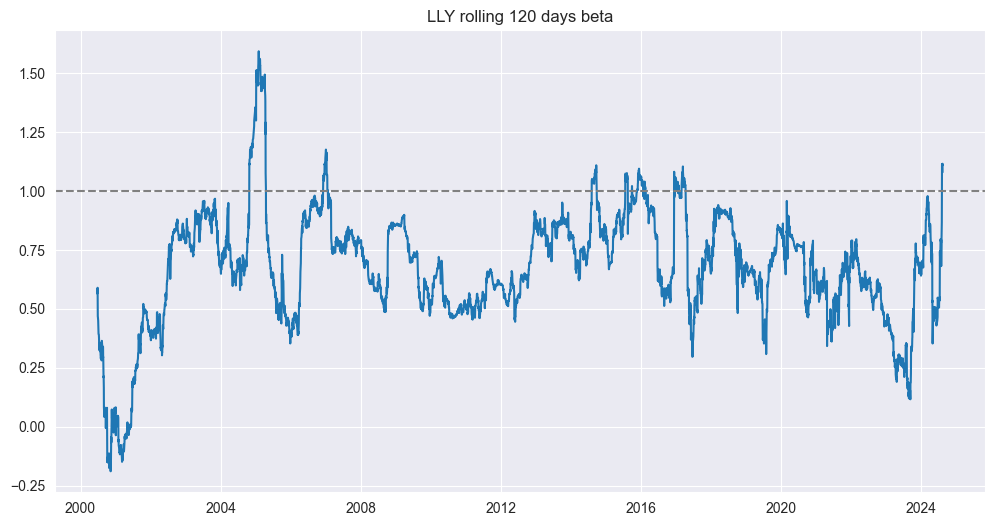

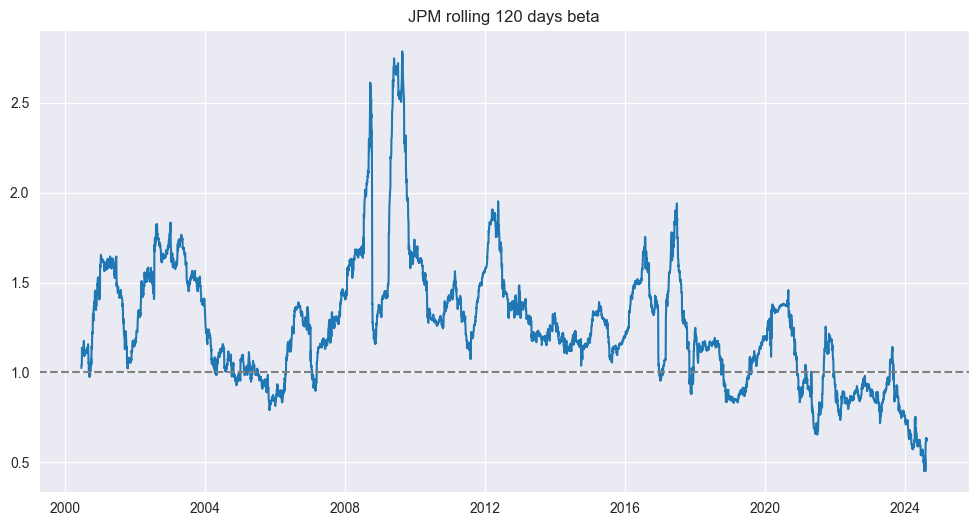

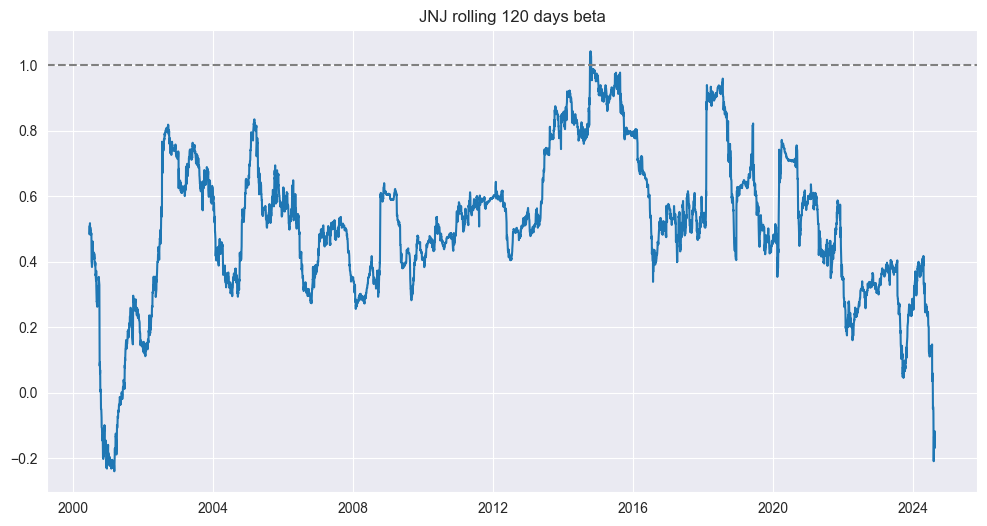

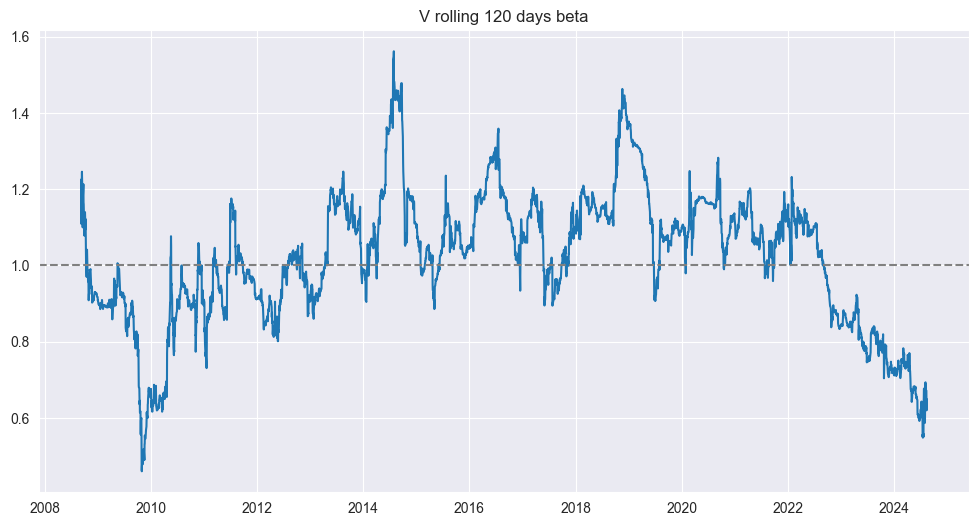

In [25]:
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(datess[ticker], betass[ticker])
    plt.axhline(1, color='grey', linestyle='--')
    plt.title(f'{ticker} rolling {days} days beta')


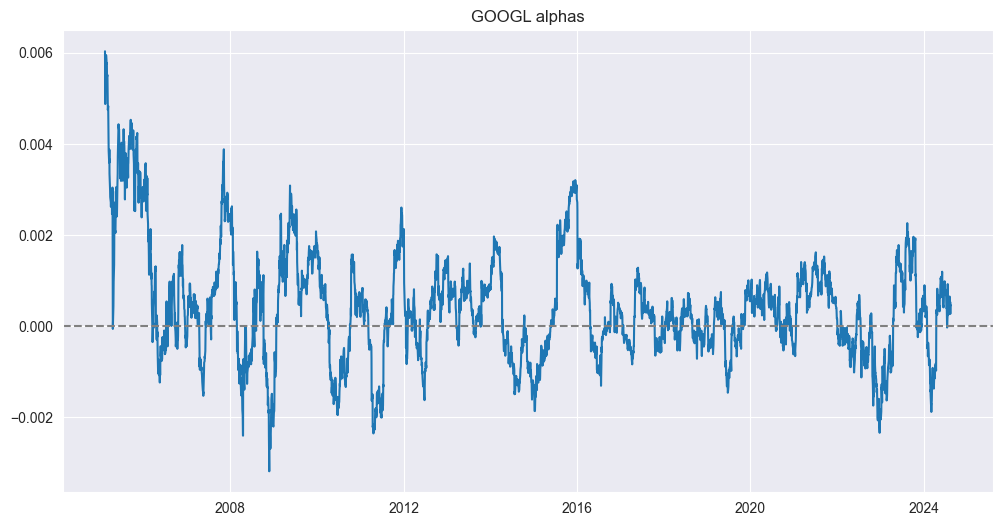

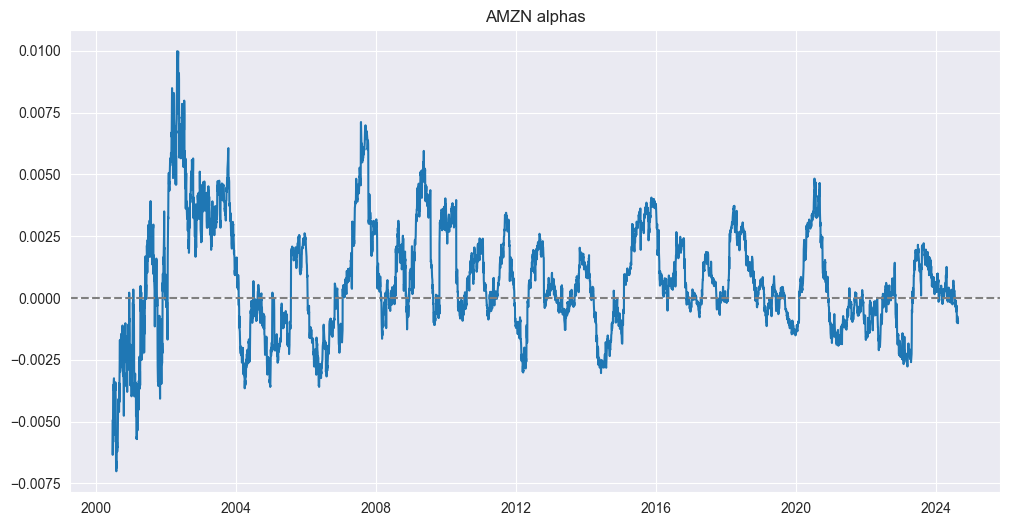

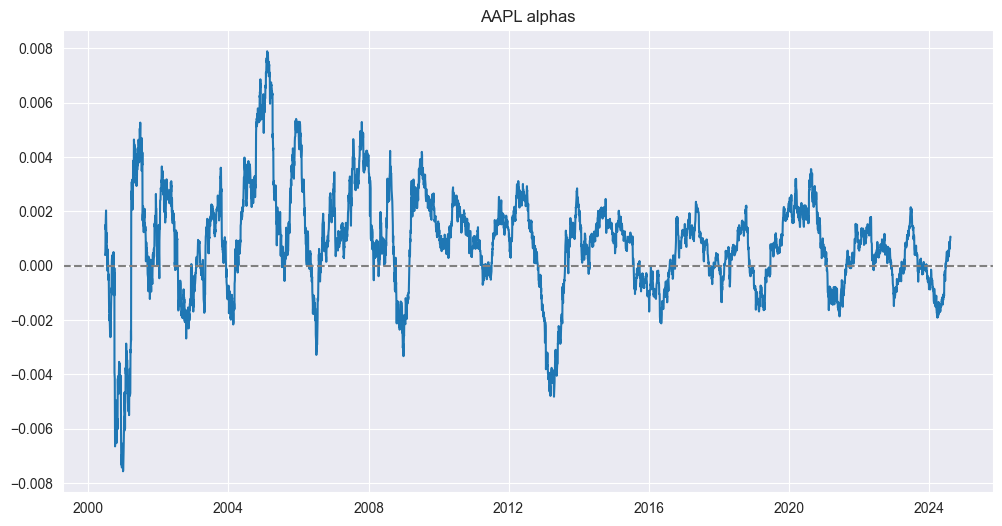

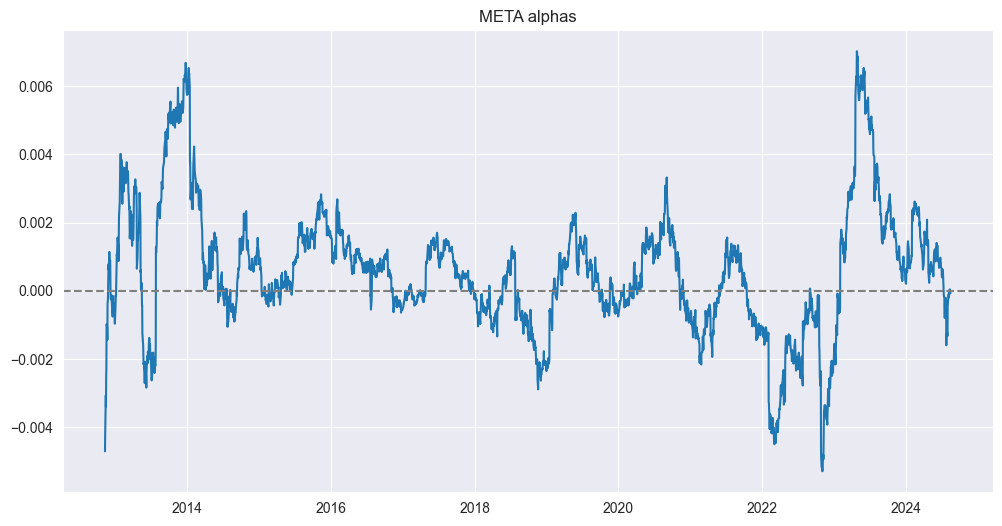

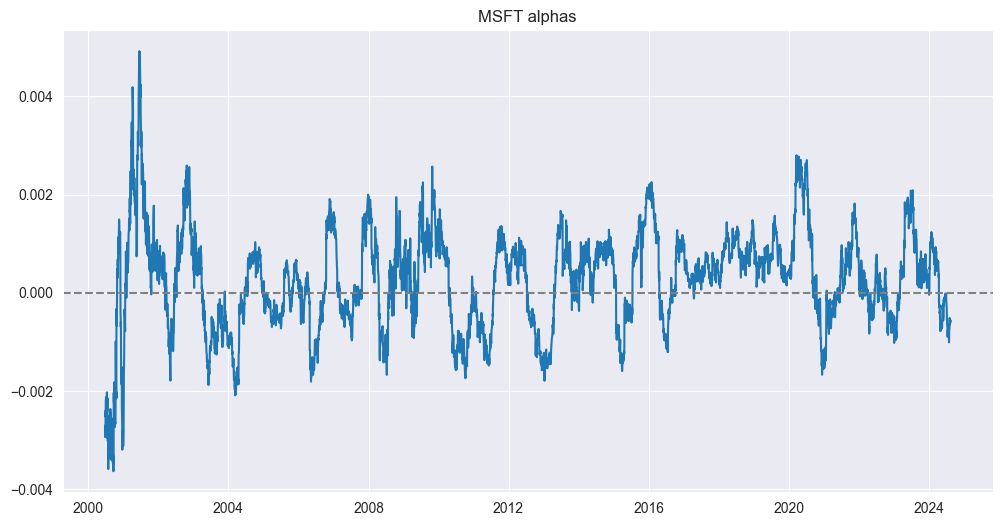

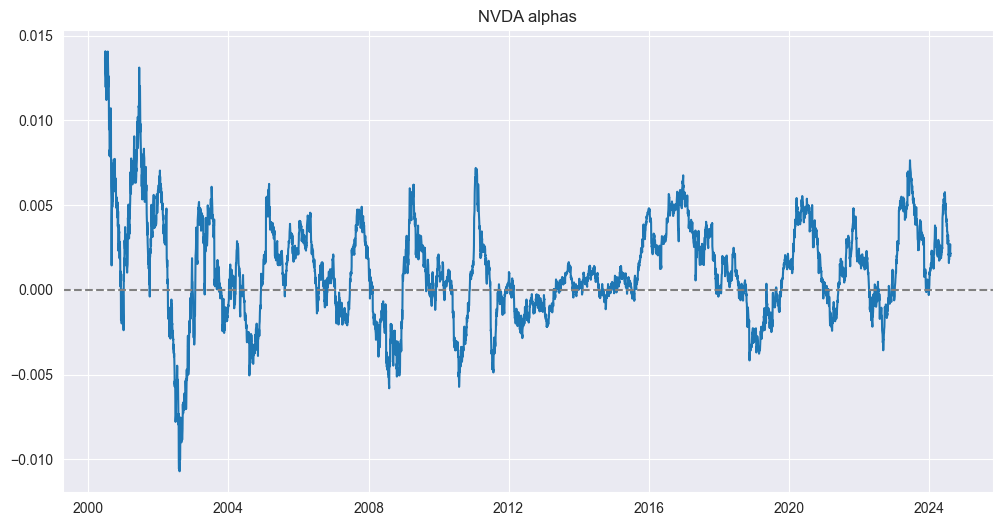

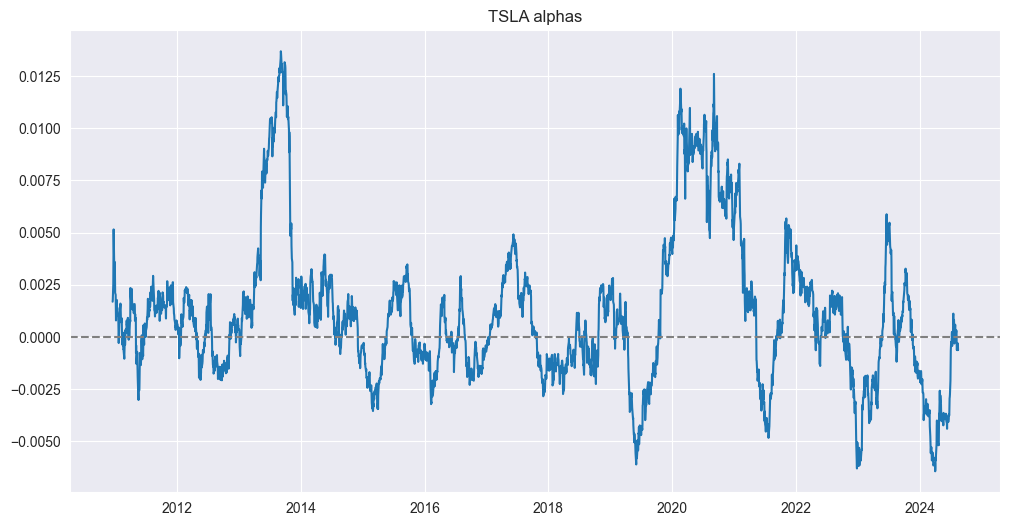

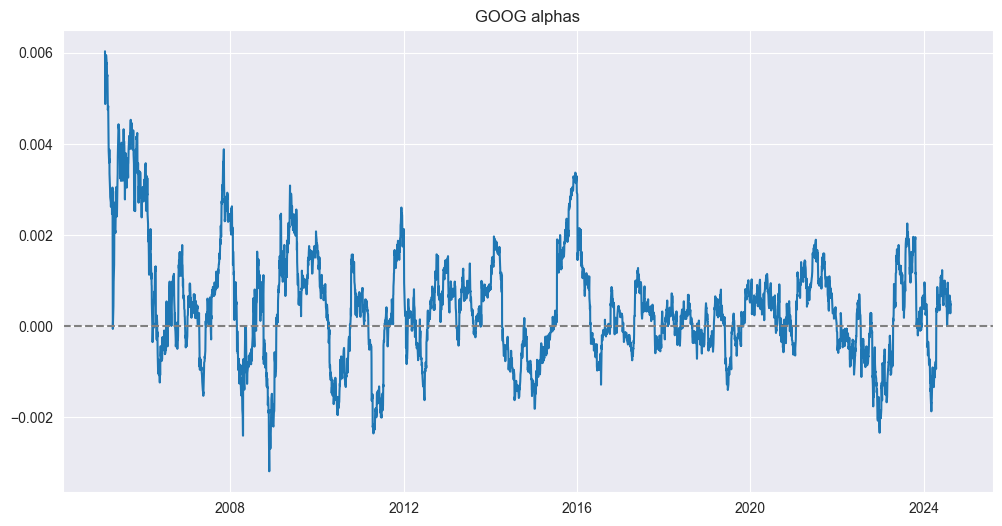

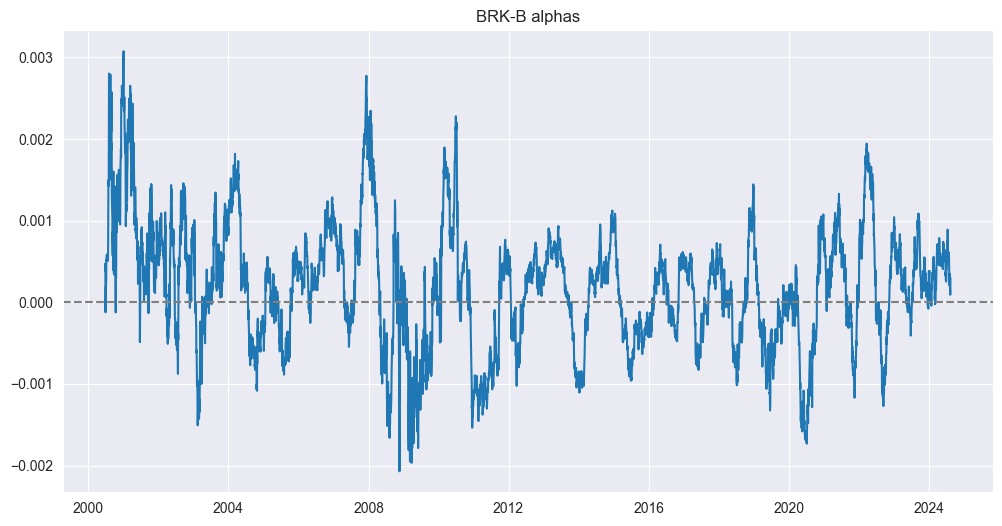

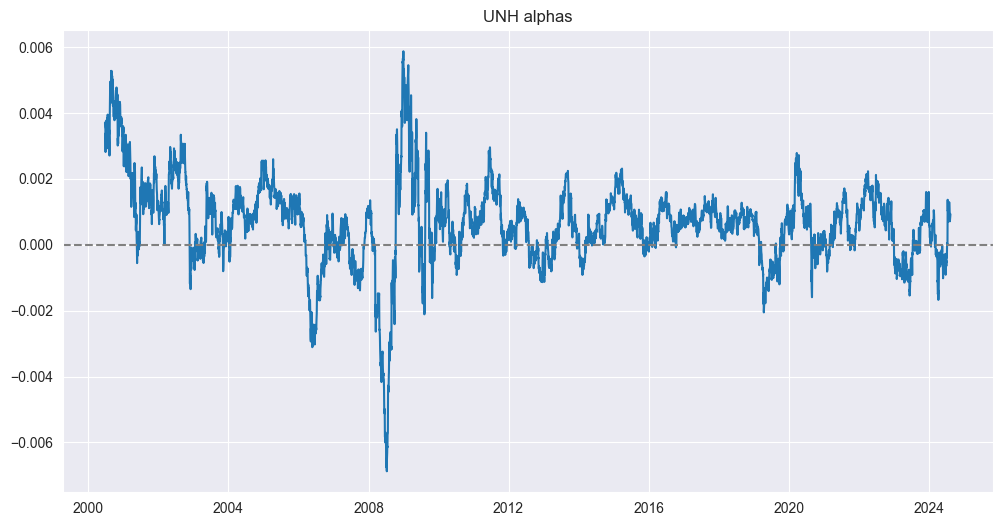

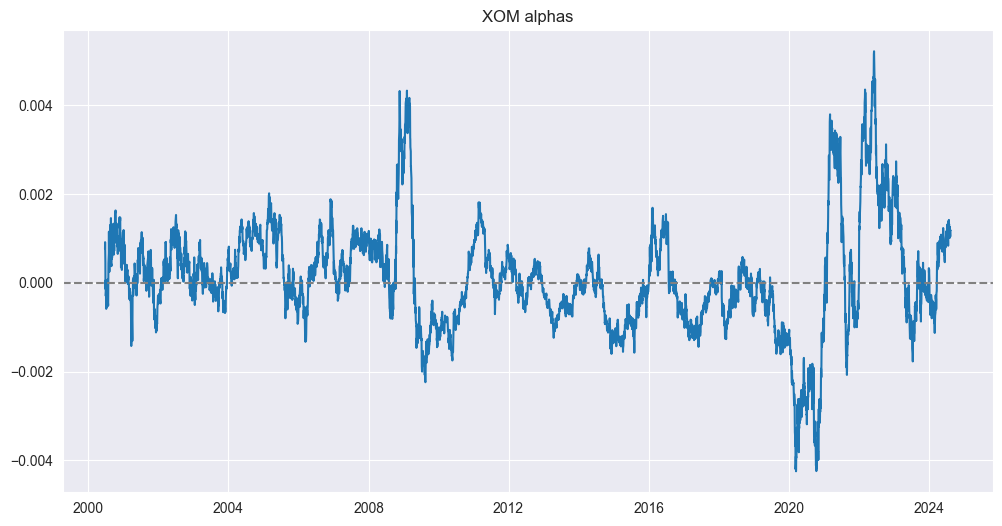

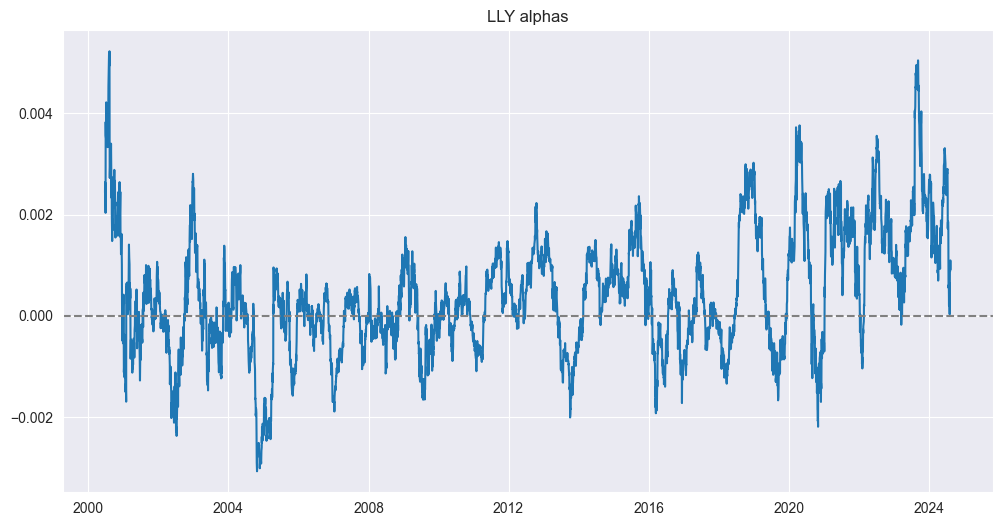

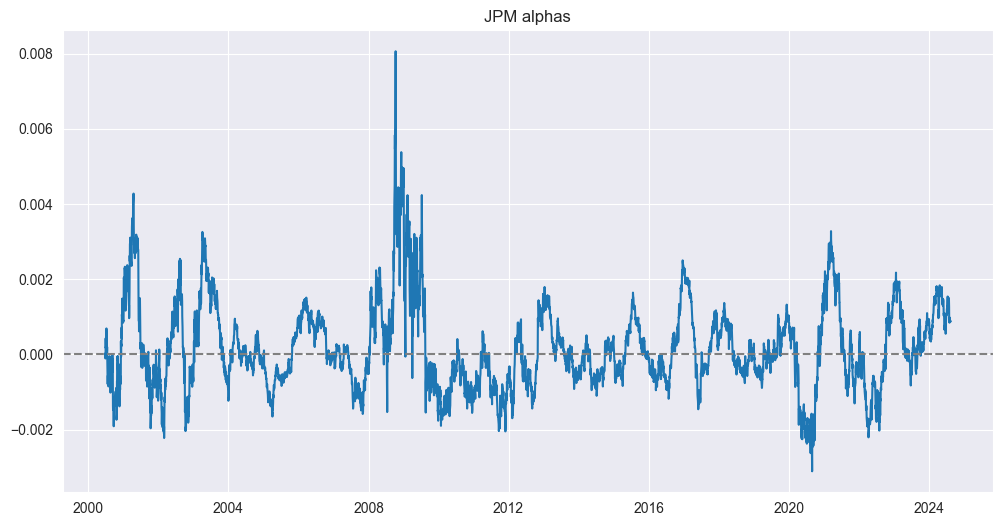

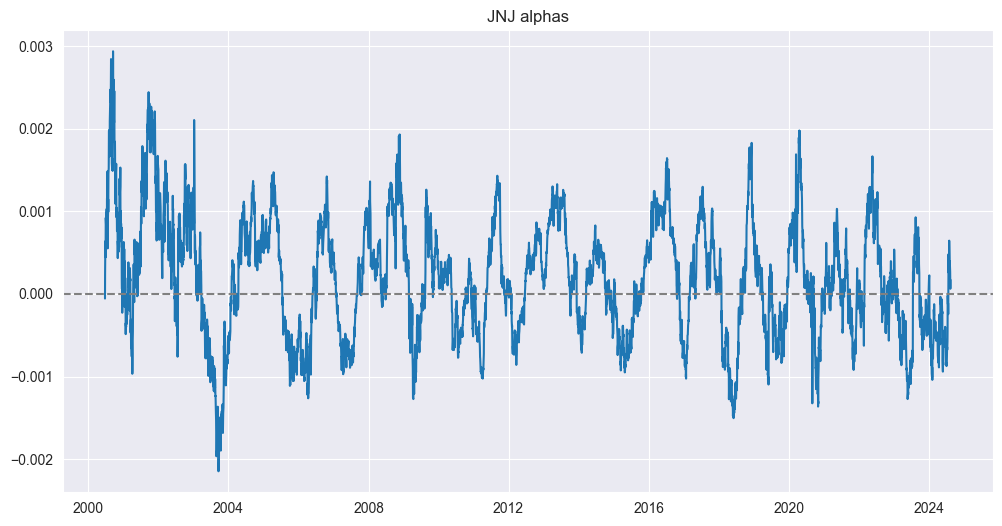

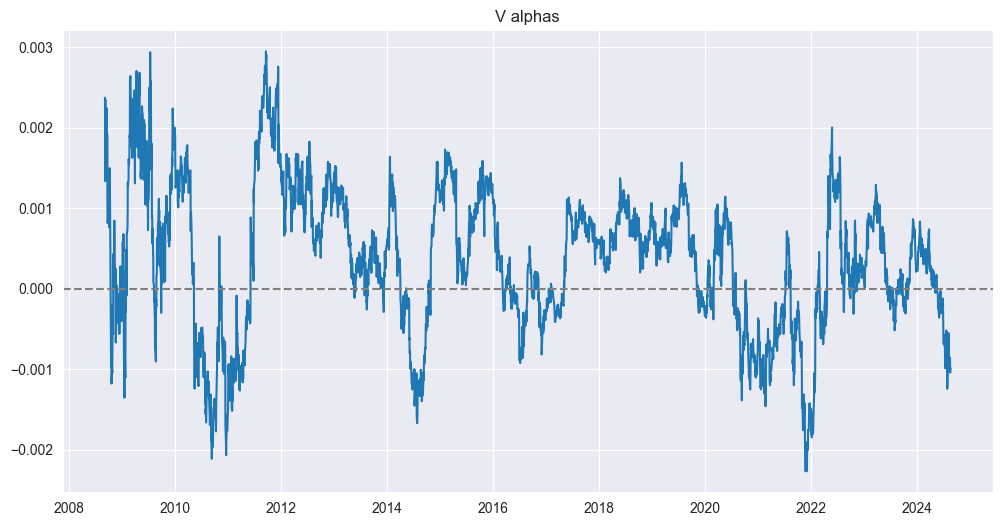

In [26]:
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(datess[ticker], alphass[ticker])
    plt.axhline(0, color='grey', linestyle='--')
    plt.title(f'{ticker} alphas')

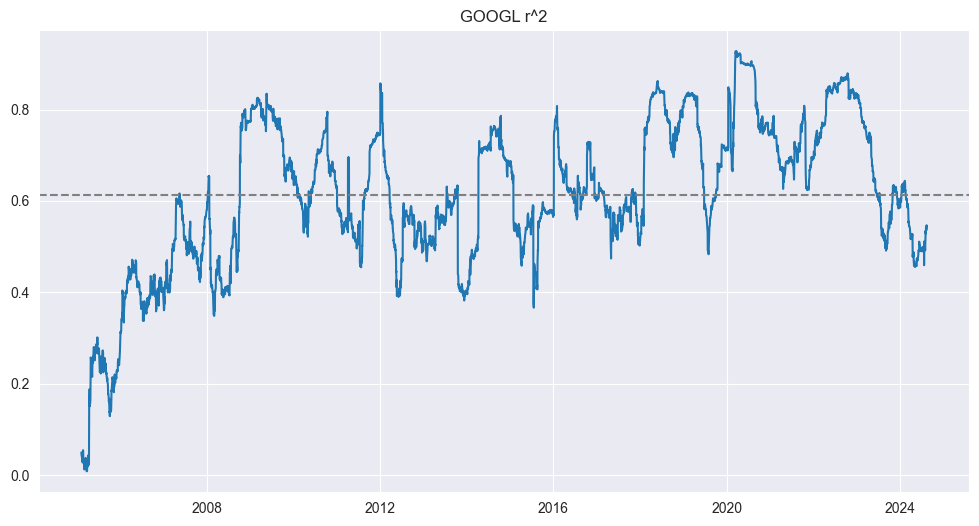

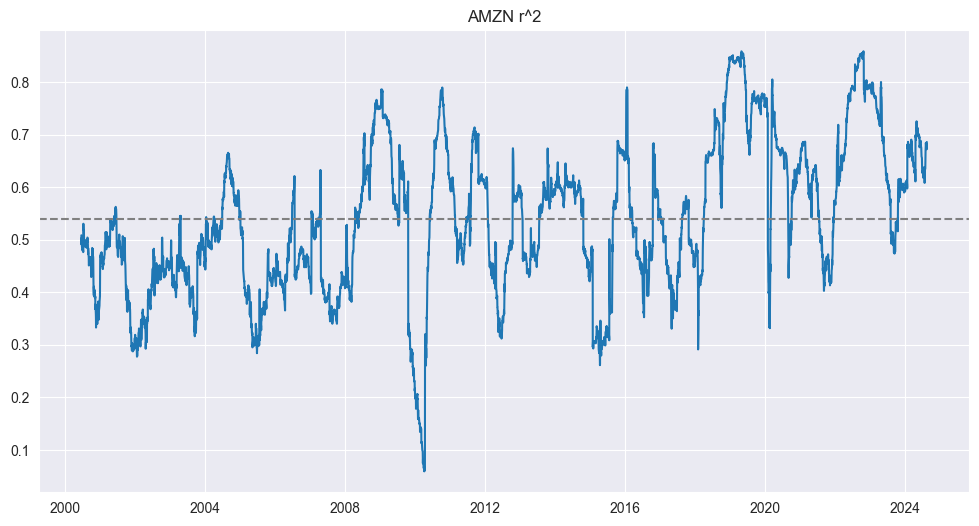

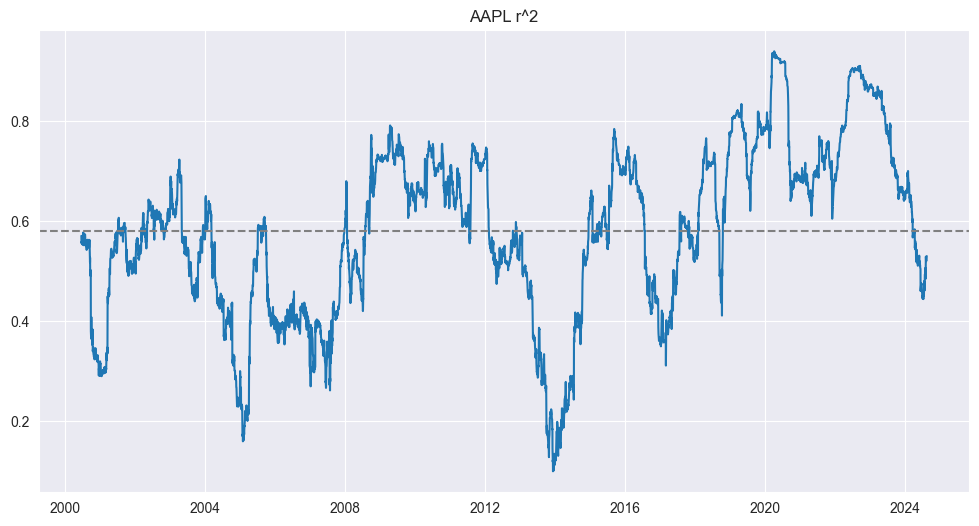

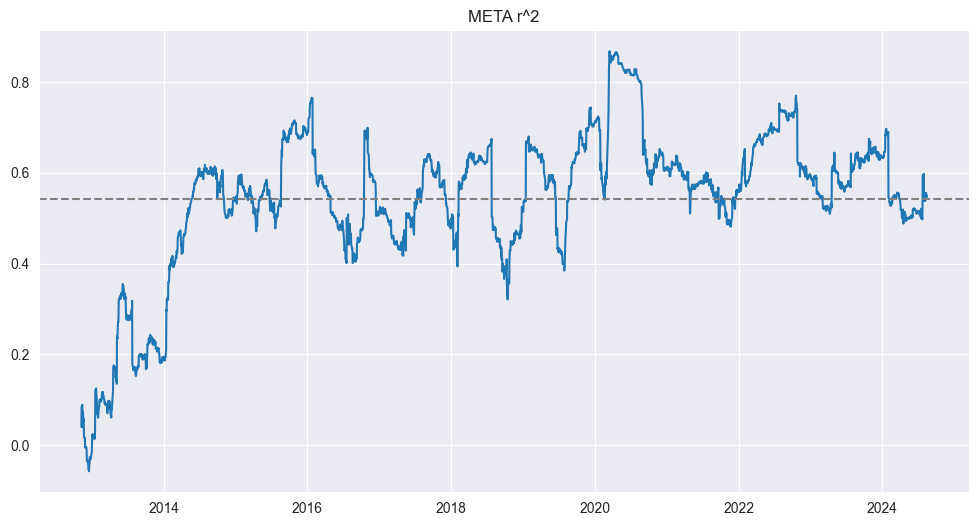

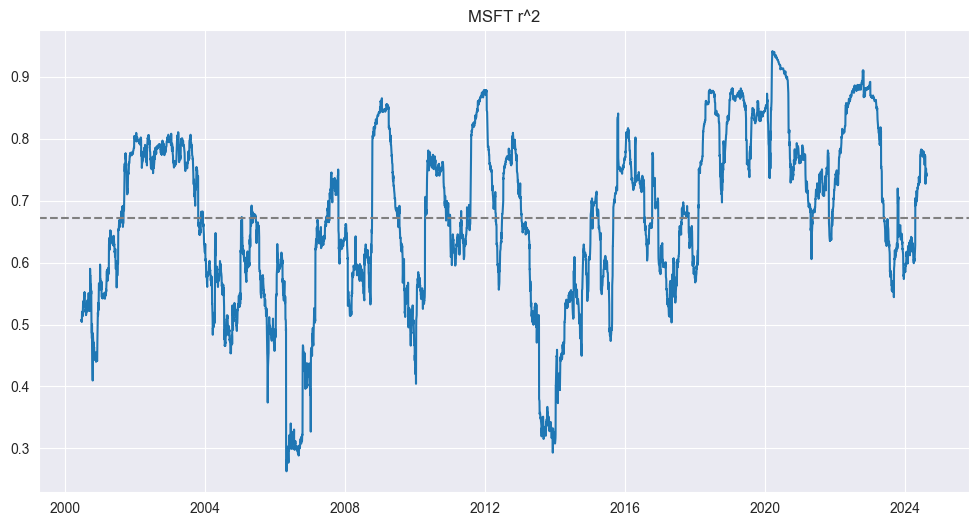

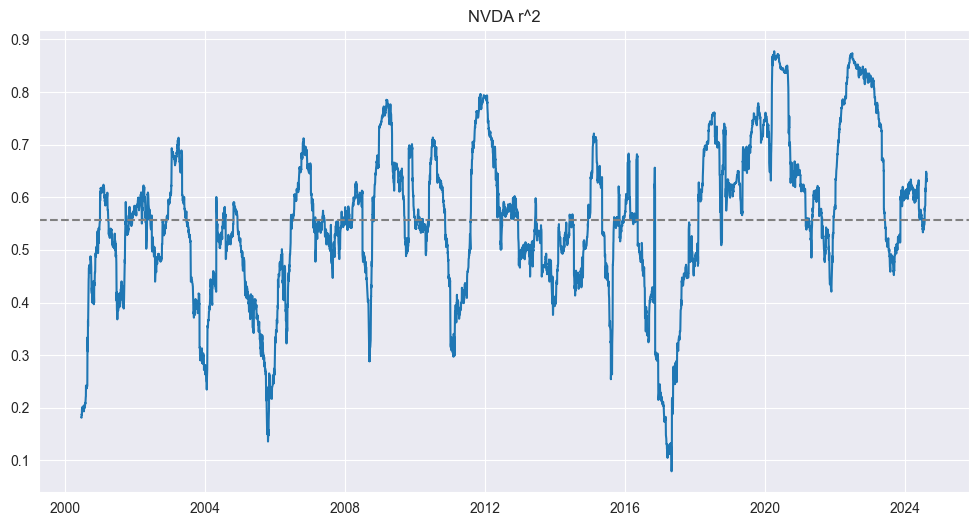

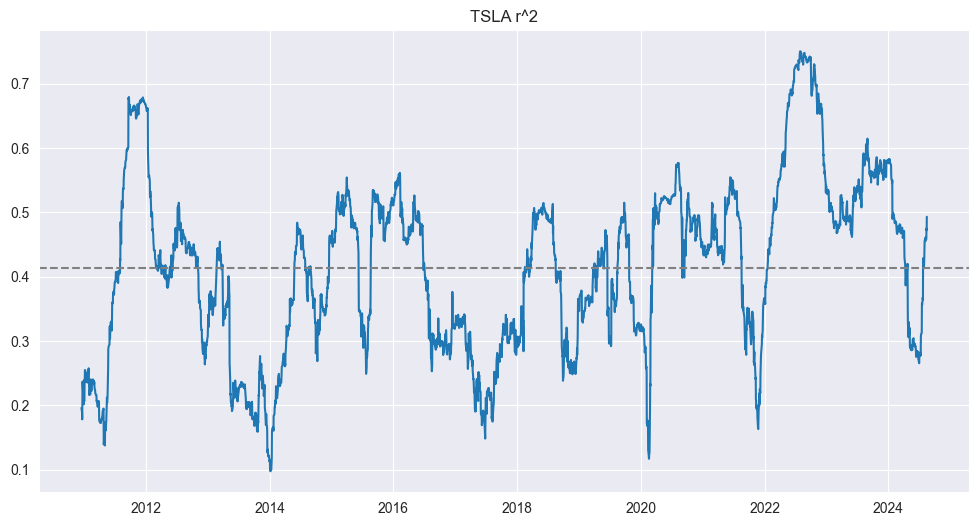

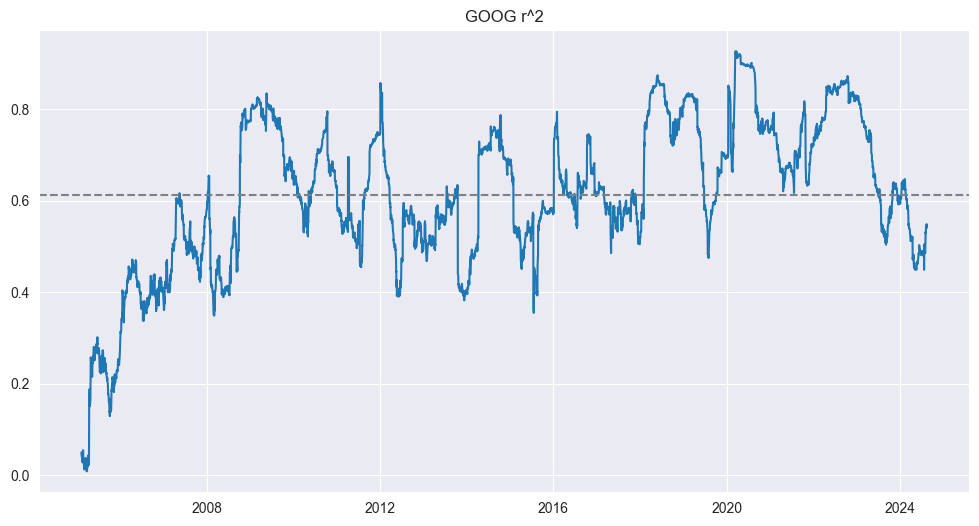

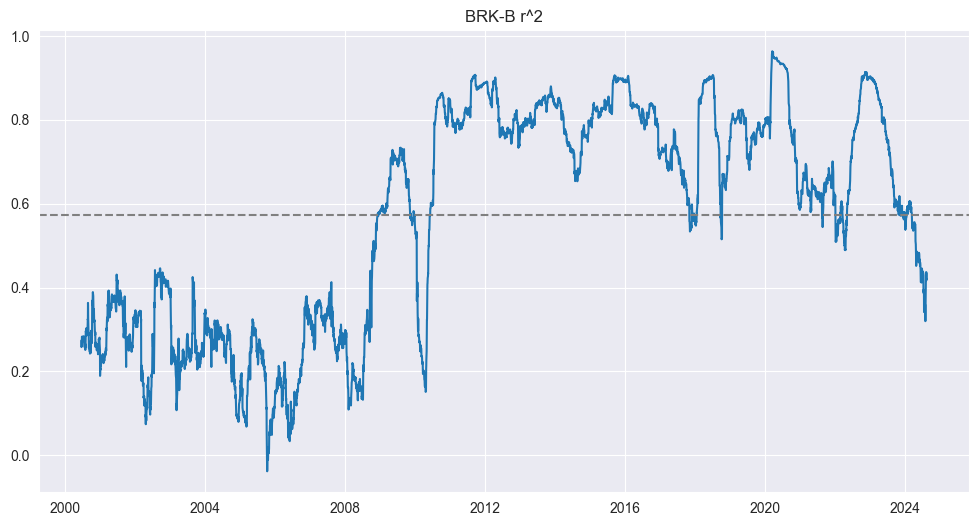

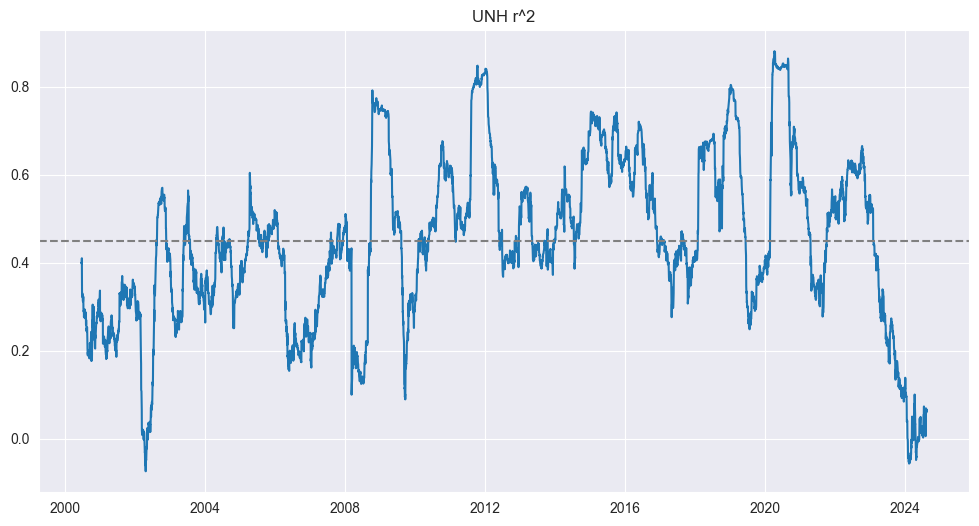

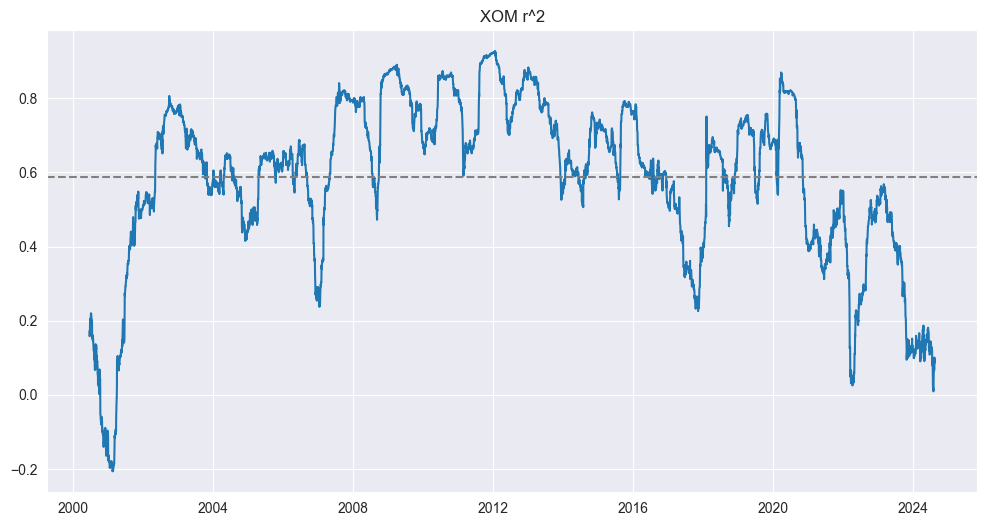

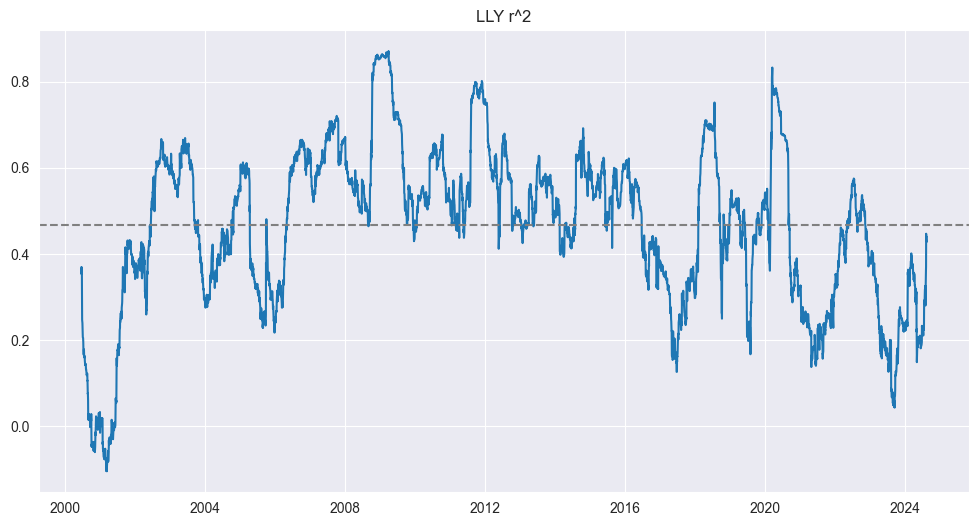

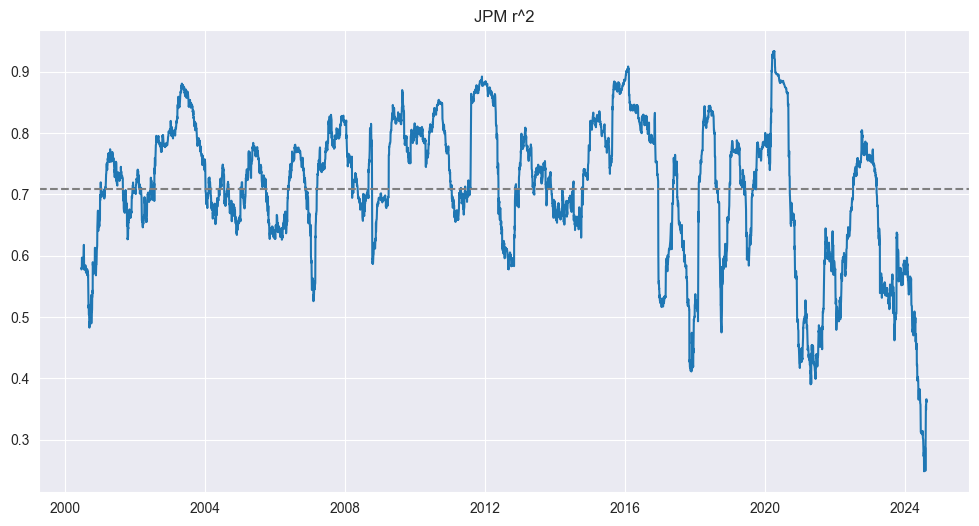

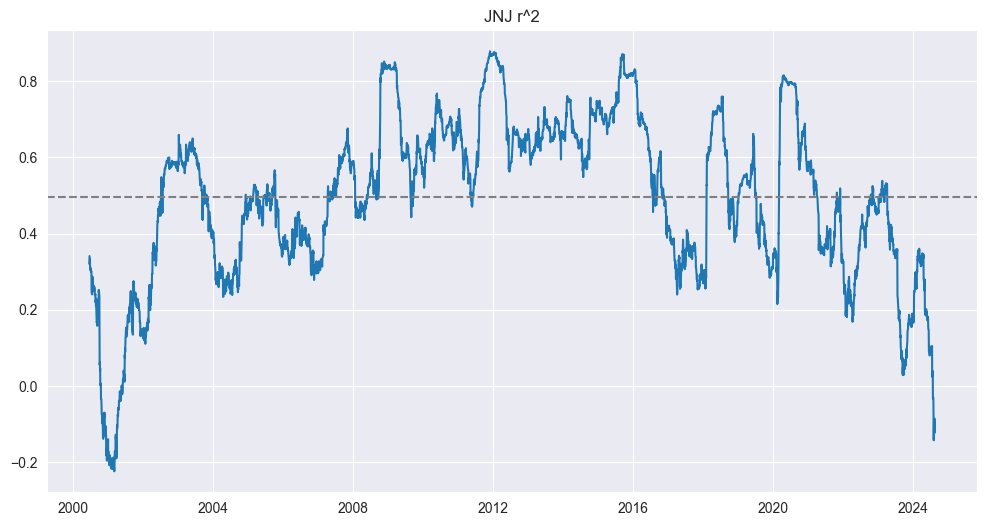

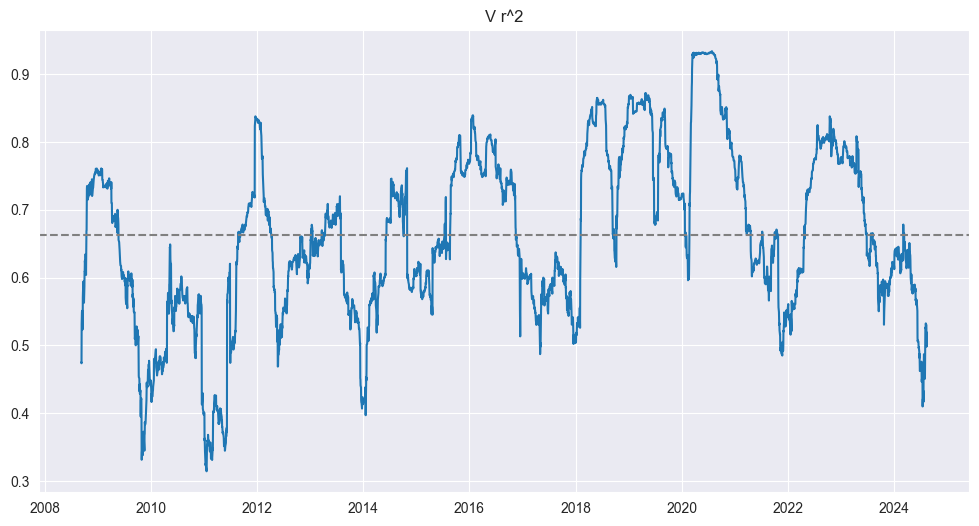

In [27]:
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(datess[ticker], rss[ticker])
    plt.axhline(np.array(rss[ticker]).mean(), color='grey', linestyle='--')
    plt.title(f'{ticker} r^2')